# Test De-Noising Model Implementation (to be deleted)

Since no DL image can be created now (noise need to be further analyzed), we try the denoising model with the real CT images.

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
torch.cuda.get_device_name(0)

'NVIDIA A100-SXM4-40GB'

In [23]:
from torchvision.io import read_image

b = read_image('to_delete/train/image_0.png').to('cuda')

In [5]:
from models.dncnn.model import DnCNN

model = DnCNN().to(torch.device('cuda'))

# Count the number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Number of parameters:", num_params)

Number of parameters: 557057


In [4]:
from torchmetrics.image import StructuralSimilarityIndexMeasure

ssim_calculator = StructuralSimilarityIndexMeasure(data_range=255).to('cuda')

In [4]:
# Check currently allocated memory
allocated_memory = torch.cuda.memory_allocated()
print("Currently allocated GPU memory:", allocated_memory / 1024**3, "GB")

# Check peak memory usage
peak_memory = torch.cuda.max_memory_allocated()
print("Peak GPU memory usage:", peak_memory / 1024**3, "GB")

Currently allocated GPU memory: 0.0 GB
Peak GPU memory usage: 0.0 GB


## Model

In [1]:
import os
import torch
import numpy as np

from utils import load_data

from models.cnn_trainer import CnnTrainer
from models.cnn_viewer import CnnViewer
from models.noises import gaussian, pixel_intensity_adaptive

%load_ext autoreload
%autoreload 2

loaded_stat_analysis = np.load('data_stats_analysis/ct_stat_results.npz', allow_pickle=True)
var_dict = loaded_stat_analysis['noise_var_dict'].item()

## Data

Create a folder to be deleted to have png images to  test our model. Already created.

Define model parameters

Start Training DnCNN model :
Epoch 1/1...


Progress of training epoch 1: 12it [02:23, 11.96s/it]                        
Progress of validation metrics epoch 1: 3it [00:37, 12.33s/it]                       


Train average metrics: 
	loss (MSE)=5.69e+00, PSNR=4.20e+01, SSIM=9.57e-01
Validation average metrics:
	loss (MSE)=1.74e+05, PSNR=-2.23e+00, SSIM=9.66e-02
learning rate=4.18e-03
Finish Training DnCNN model !


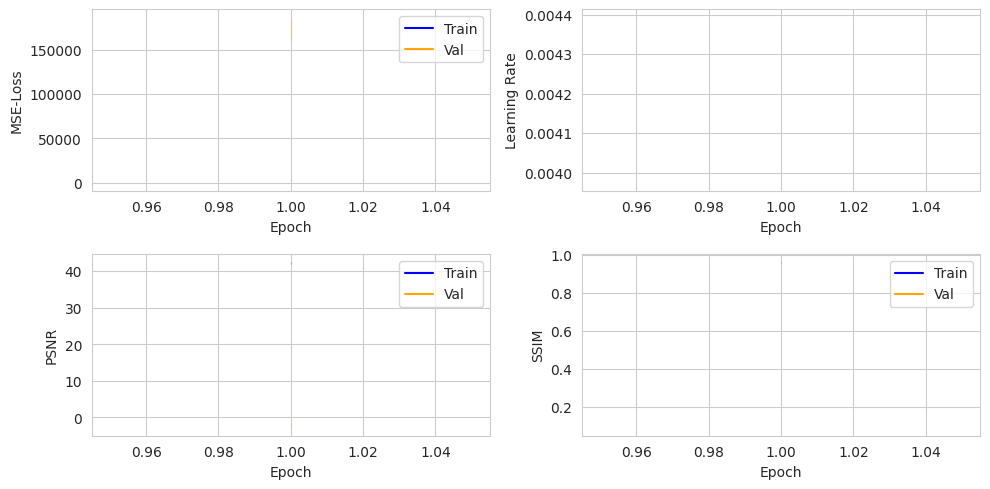

In [3]:
data_kwargs = dict(
    batch_size=15,
    images_folder_path='to_delete/train',
    add_noise=lambda x: pixel_intensity_adaptive(x, var_dict=var_dict)
)

optimizer_kwargs = dict(
    lr=1e-2,
    weight_decay=1e-3
)

cnn = CnnTrainer(
    model_name='DnCNN',
    data_kwargs=data_kwargs,
    num_epochs=1,
    device='cuda',
    optimizer_kwargs=optimizer_kwargs,
    model_saving_path=None,
    val_size=0.2
)

cnn.fit(plot=True)

In [ ]:
import matplotlib.pyplot as plt

loader = cnn.training_loader
# Alternatively, use iter() and next() to get the next batch
data_iter = iter(loader)
batch = next(data_iter)

data, target = batch[1][0], batch[0][0]

plt.figure(figsize=(5,5))
plt.imshow((data-target).cpu().numpy().squeeze(), cmap='grey')
plt.show()